In [1]:
from get_data_32 import extract
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# da = pd.read_csv("dhoni_angles.csv")

In [ ]:
from pytube import YouTube
yt = YouTube("https://www.youtube.com/watch?v=n06H7OcPd-g")
yt = yt.get('mp4', '720p')
yt.download()

In [2]:
da = da.iloc[: , 1:]

In [3]:
da

,rig_shou,rig_elbow,rig_wrist,rig_hip,rig_knee,rig_heel,left_shou,left_elbow,left_wrist,left_hip,left_knee,left_heel
0,3.639571,62.697831,58.341755,196.596099,172.810596,261.860518,5.328603,239.388341,22.794797,194.486060,169.167930,268.739066
1,4.942216,77.934114,62.656975,197.228394,171.128547,263.587522,6.370331,241.363033,23.560004,196.629608,166.088481,268.744982
2,5.573453,82.947276,64.940386,197.531205,170.341427,263.667403,6.920494,241.607170,23.923698,197.423072,164.302760,265.697760
3,6.201503,267.515228,32.987164,198.177785,169.469918,263.294452,8.118073,238.766702,19.468466,199.779731,160.989609,266.188786
4,7.066272,261.565159,16.838268,198.525407,171.334162,258.693057,8.457108,243.069500,19.375006,201.571616,158.409598,267.398551
...,...,...,...,...,...,...,...,...,...,...,...,...
82,8.022544,199.874187,8.518054,197.528540,168.715630,266.187219,4.809505,206.041846,11.073081,185.394248,179.014639,195.970293
83,8.484878,198.068806,5.035207,197.458267,169.570899,263.622155,3.429032,206.296658,11.623952,185.739355,179.478298,190.729292
84,8.688400,198.984507,7.036838,197.825897,170.610678,261.240025,3.737565,204.870510,12.129182,186.352819,178.982123,188.828577
85,9.072988,193.952400,19.334502,198.658572,170.750913,258.024109,3.488738,204.506872,11.843842,186.969033,178.977518,186.356885


# Extract co-ordinates of any new video

In [4]:
js = extract("jp.mp4")

yes
done


# Match number of rows

In [5]:
if js.shape[0]>87:
    js = js[:88]
elif js.shape[0]<87:
    da = da[:js.shape[0]]

In [6]:
da2 = da[:js.shape[0]]

In [7]:
js.shape[0]

39

In [8]:
da.shape

(39, 12)

# Get angles of movements on new dataframe/video

In [9]:
def calculate_angle2(a1,a2,b1,b2,c1,c2): 
    radians = np.arctan2(c2-b2, c1-b1) - np.arctan2(a2-b2, a1-b1)
    angle = np.abs(radians*180.0/np.pi)    
    return angle 

In [10]:
def find_angles(df):
    mf = pd.DataFrame()
    rig_shou= []
    rig_elbow= []
    rig_wrist= []
    rig_hip= []
    rig_knee= []
    rig_heel= []
    left_shou= []
    left_elbow= []
    left_wrist= []
    left_hip= []
    left_knee= []
    left_heel= []
    for i in range(df.shape[0]):
        rig_shou.append(calculate_angle2(df.RIGHT_HIP_X.iloc[i],df.RIGHT_HIP_Y.iloc[i],df.RIGHT_SHOULDER_X.iloc[i],
                                         df.RIGHT_SHOULDER_Y.iloc[i],df.RIGHT_ELBOW_X.iloc[i],df.RIGHT_ELBOW_Y.iloc[i]))

        rig_elbow.append(calculate_angle2(df.RIGHT_SHOULDER_X.iloc[i],df.RIGHT_SHOULDER_Y.iloc[i],df.RIGHT_ELBOW_X.iloc[i],
                                          df.RIGHT_ELBOW_Y.iloc[i],df.RIGHT_WRIST_X.iloc[i],df.RIGHT_WRIST_Y.iloc[i],))

        rig_wrist.append(calculate_angle2(df.RIGHT_INDEX_X.iloc[i],df.RIGHT_INDEX_Y.iloc[i],df.RIGHT_WRIST_X.iloc[i],
                                          df.RIGHT_WRIST_Y.iloc[i],df.RIGHT_THUMB_X.iloc[i],df.RIGHT_THUMB_Y.iloc[i]))

        rig_hip.append(calculate_angle2(df.RIGHT_SHOULDER_X.iloc[i],df.RIGHT_SHOULDER_Y.iloc[i],df.RIGHT_HIP_X.iloc[i],
                                          df.RIGHT_HIP_Y.iloc[i],df.RIGHT_KNEE_X.iloc[i],df.RIGHT_KNEE_Y.iloc[i]))

        rig_knee.append(calculate_angle2(df.RIGHT_HIP_X.iloc[i],df.RIGHT_HIP_Y.iloc[i],df.RIGHT_KNEE_X.iloc[i],
                                         df.RIGHT_KNEE_Y.iloc[i],df.RIGHT_HEEL_X.iloc[i],df.RIGHT_HEEL_Y.iloc[i]))

        rig_heel.append(calculate_angle2(df.RIGHT_KNEE_X.iloc[i],df.RIGHT_KNEE_Y.iloc[i],df.RIGHT_HEEL_X.iloc[i],
                                         df.RIGHT_HEEL_Y.iloc[i],df.RIGHT_FOOT_INDEX_X.iloc[i],df.RIGHT_FOOT_INDEX_Y.iloc[i]))

        left_shou.append(calculate_angle2(df.LEFT_HIP_X.iloc[i],df.LEFT_HIP_Y.iloc[i],df.LEFT_SHOULDER_X.iloc[i],
                                          df.LEFT_SHOULDER_Y.iloc[i],df.LEFT_ELBOW_X.iloc[i],df.LEFT_ELBOW_Y.iloc[i]))

        left_elbow.append(calculate_angle2(df.LEFT_SHOULDER_X.iloc[i],df.LEFT_SHOULDER_Y.iloc[i],df.LEFT_ELBOW_X.iloc[i],
                                          df.LEFT_ELBOW_Y.iloc[i],df.LEFT_WRIST_X.iloc[i],df.LEFT_WRIST_Y.iloc[i],))

        left_wrist.append(calculate_angle2(df.LEFT_INDEX_X.iloc[i],df.LEFT_INDEX_Y.iloc[i],df.LEFT_WRIST_X.iloc[i],
                                          df.LEFT_WRIST_Y.iloc[i],df.LEFT_THUMB_X.iloc[i],df.LEFT_THUMB_Y.iloc[i]))

        left_hip.append(calculate_angle2(df.LEFT_SHOULDER_X.iloc[i],df.LEFT_SHOULDER_Y.iloc[i],df.LEFT_HIP_X.iloc[i],
                                          df.LEFT_HIP_Y.iloc[i],df.LEFT_KNEE_X.iloc[i],df.LEFT_KNEE_Y.iloc[i]))

        left_knee.append(calculate_angle2(df.LEFT_HIP_X.iloc[i],df.LEFT_HIP_Y.iloc[i],df.LEFT_KNEE_X.iloc[i],
                                         df.LEFT_KNEE_Y.iloc[i],df.LEFT_HEEL_X.iloc[i],df.LEFT_HEEL_Y.iloc[i]))

        left_heel.append(calculate_angle2(df.LEFT_KNEE_X.iloc[i],df.LEFT_KNEE_Y.iloc[i],df.LEFT_HEEL_X.iloc[i],
                                         df.LEFT_HEEL_Y.iloc[i],df.LEFT_FOOT_INDEX_X.iloc[i],df.LEFT_FOOT_INDEX_Y.iloc[i]))
        
    mf["rig_shou"] = rig_shou
    mf["rig_elbow"] =rig_elbow 
    mf["rig_wrist"] = rig_wrist
    mf["rig_hip"] =rig_hip
    mf["rig_knee"] = rig_knee 
    mf["rig_heel"] = rig_heel
    mf["left_shou"] = left_shou
    mf["left_elbow"] = left_elbow
    mf["left_wrist"] = left_wrist
    mf["left_hip"] = left_hip 
    mf["left_knee"] = left_knee
    mf["left_heel"] = left_heel
    
    return mf
#     return rig_shou,rig_elbow,rig_wrist,rig_hip,rig_knee,rig_heel,left_shou,left_elbow,left_wrist,left_hip,left_knee,left_heel



In [11]:
pa = find_angles(js)

# comparing graphs of individual columns/pointers

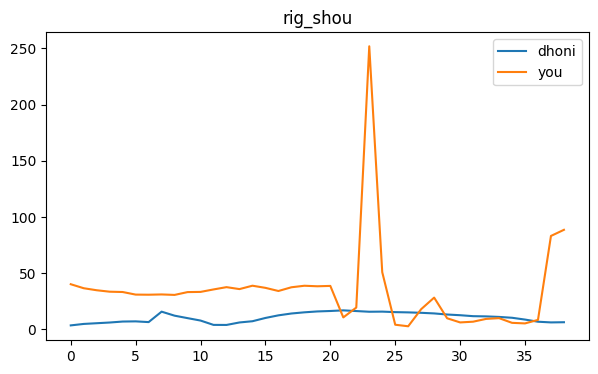

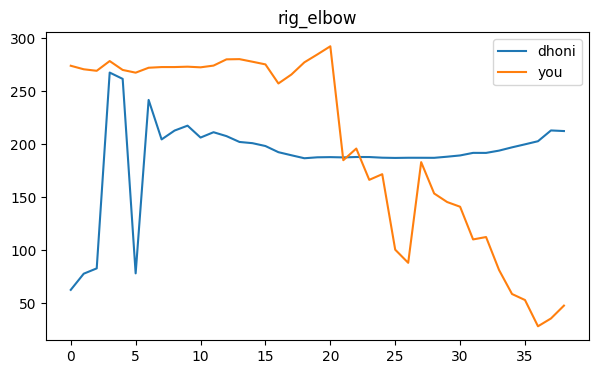

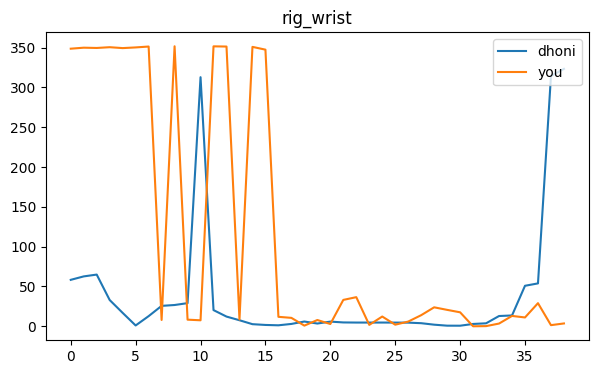

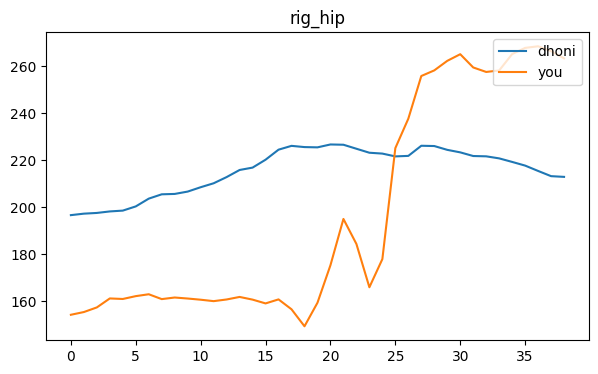

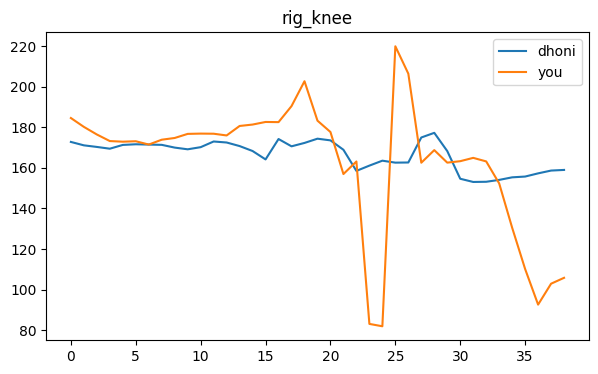

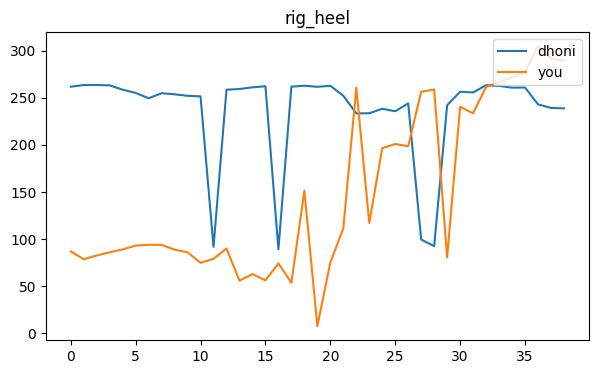

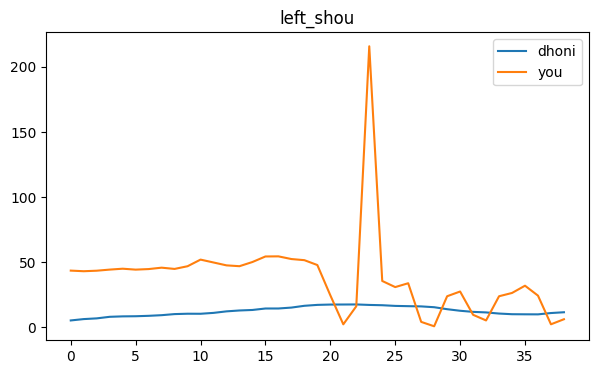

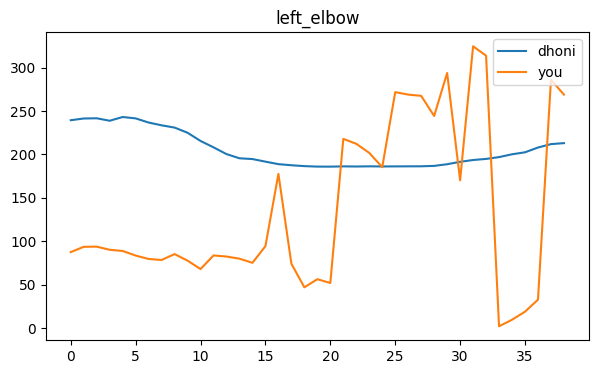

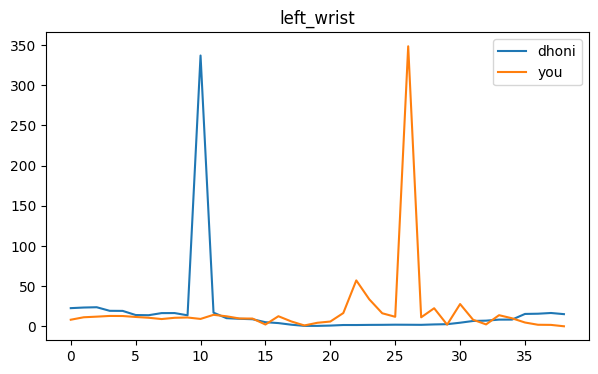

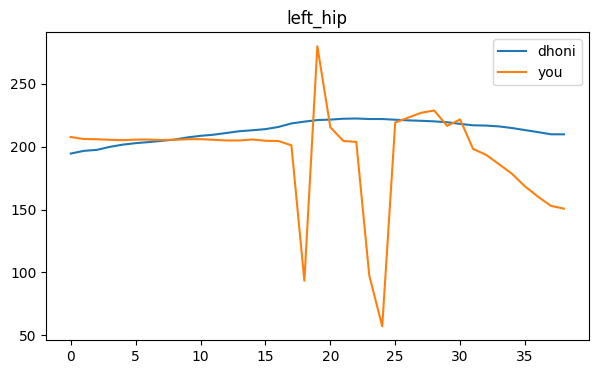

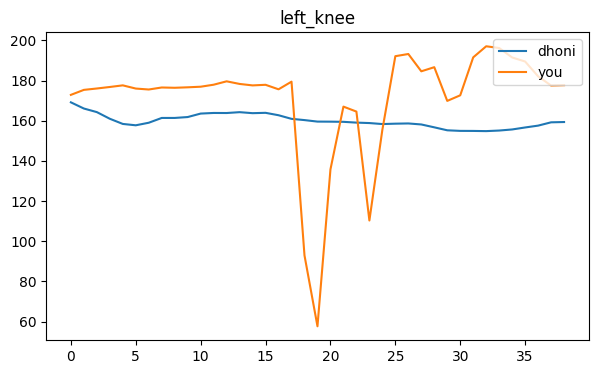

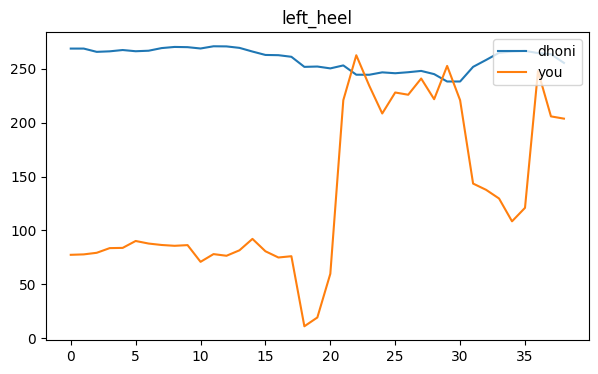

In [12]:

for x in range(da.shape[1]):
    plt.figure(figsize=(7,4))
    da.iloc[:,x].plot(label = "dhoni"),pa.iloc[:,x].plot(label = "you")
    plt.title(da.columns[x])
    plt.legend(loc="upper right")
    plt.show()

In [13]:
d = {}
for x in range(da.shape[1]):
#     print(df.iloc[:,x].corr(js.iloc[:,x]), "of ", df.columns[x])
    d[da.columns[x]] = da.iloc[:,x].corr(pa.iloc[:,x])
sum = 0
for x in d.values():
    sum = abs(x)*100 + sum
print("you match dhoni by ",sum/(da.shape[1])," %")

you match dhoni by  22.37670461724922  %
